In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_excel('/Users/mckayladavid/Documents/GitHub/Group019_WI24/data/tech_layoffs.xlsx')

df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [4]:
print(df.dtypes)
print(df.columns)

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object
Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'ln

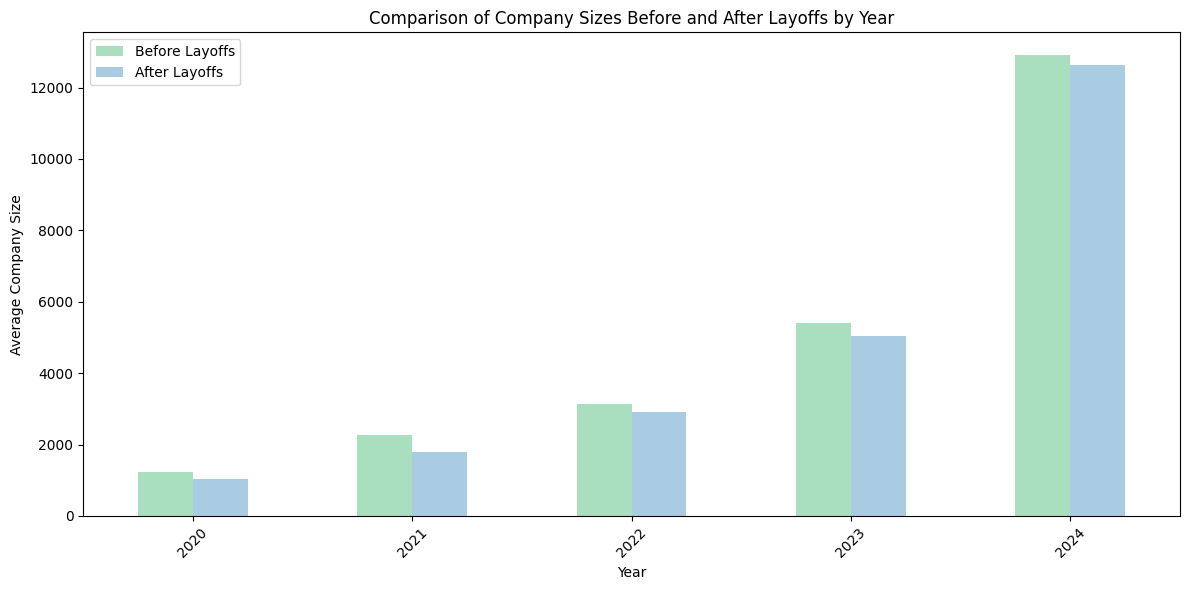

In [5]:
# company size before/after layoffs by industry
industry_sizes = df.groupby('Year').agg({
    'Company_Size_before_Layoffs': 'mean',
    'Company_Size_after_layoffs': 'mean'
})

#plot
industry_sizes.plot(kind = 'bar', figsize = (12, 6), color  = ['#A9DFBF', '#A9CCE3'])
plt.title('Comparison of Company Sizes Before and After Layoffs by Year')
plt.xlabel('Year')
plt.ylabel('Average Company Size')
plt.xticks(rotation = 45)
plt.legend(['Before Layoffs', 'After Layoffs'])
plt.tight_layout()

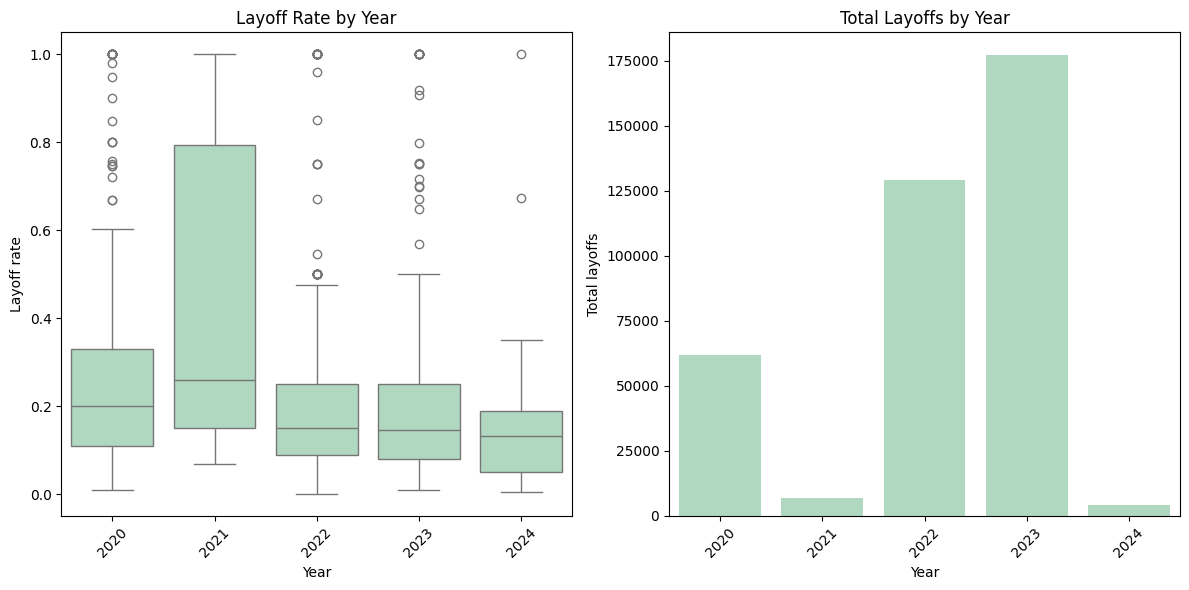

In [12]:
# layoff rate for each company
df['Layoff_Rate'] = df['Laid_Off'] / df['Company_Size_before_Layoffs']

######## plots
plt.figure(figsize=(12, 6))

# layoff rate
plt.subplot(1, 2, 1)
sns.boxplot(x='Year', y='Layoff_Rate', data=df, color = '#A9DFBF')
plt.title('Layoff Rate by Year')
plt.xlabel('Year')
plt.ylabel('Layoff rate')
plt.xticks(rotation = 45)


# total layoffs by year
plt.subplot(1, 2, 2)
total_layoffs_by_year = df.groupby('Year')['Laid_Off'].sum()
sns.barplot(x=total_layoffs_by_year.index, y=total_layoffs_by_year.values, color = '#A9DFBF')
plt.title('Total Layoffs by Year')
plt.xlabel('Year')
plt.ylabel('Total layoffs')
plt.xticks(rotation = 45)


plt.tight_layout()
plt.show()



In [13]:

###### begin EDA
descriptive_stats = df.describe()

# layoff rate distribution by year
layoff_rate_by_year = df.groupby('Year')['Layoff_Rate'].describe()

# ANOVA, if layoff rates by year differ
layoff_rates_by_year = [group['Layoff_Rate'].values for _, group in df.groupby('Year')]
anova_results = stats.f_oneway(*layoff_rates_by_year)

# output ANOVA
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nLayoff Rate by Year:")
print(layoff_rate_by_year)
print("\nANOVA Test p-value:")
print(anova_results.pvalue)


Descriptive Statistics:
                 #      Laid_Off                   Date_layoffs   Percentage  \
count  1418.000000   1418.000000                           1418  1418.000000   
mean   1823.411848    267.392102  2022-05-03 22:26:34.358251008    21.901584   
min       3.000000      3.000000            2020-03-12 00:00:00     0.044980   
25%    1038.500000     40.000000            2022-02-17 06:00:00    10.000000   
50%    1882.500000     86.000000            2022-09-23 00:00:00    15.000000   
75%    2616.250000    200.000000            2023-02-09 00:00:00    27.000000   
max    3290.000000  12000.000000            2024-11-01 00:00:00   100.000000   
std     922.671427    877.468380                            NaN    20.661776   

       Company_Size_before_Layoffs  Company_Size_after_layoffs         Year  \
count                  1418.000000                 1418.000000  1418.000000   
mean                   3556.228491                 3288.836389  2021.878702   
min               

Since the calculated p-value is less than 0.001, the results are highly statistically significant, indicating that the variation in layoff rates across different years is not due to random chance (reject the null)

In [14]:
# regression analysis 

X = df[['Year', 'Company_Size_before_Layoffs']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['Laid_Off']

# regression model
model = sm.OLS(y, X).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               Laid_Off   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     659.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          4.56e-203
Time:                        21:49:18   Log-Likelihood:                -11155.
No. Observations:                1418   AIC:                         2.232e+04
Df Residuals:                    1415   BIC:                         2.233e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The F-statistic and its correlating p-value proves that the overall mdel is statistically significant.
The p-value for 'Company_Size_before_Layoffs' suggests it is an important factor in prediciting the number of layoffs, while 'Year' does not have a significant effect (according to this model). 
The large condition number suggests potential multicolinearity issues (predictors might be correlated with each other).